In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
csv_loc='/content/drive/My Drive/Colab Notebooks/final_dataset.csv'
csv_loc

'/content/drive/My Drive/Colab Notebooks/final_dataset.csv'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

cols=[' Protocol',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',' Bwd Packets/s',' Min Packet Length',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count',' RST Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',' Fwd Header Length','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes','Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',' Idle Min',' Label']


data=pd.read_csv(csv_loc)

data=data[(data[' Source Port']==22) | (data[' Destination Port']==22)]

data[' Label'][data[' Label']=='SSH-Patator']=1
data[' Label'][data[' Label']=='BENIGN']=0


data=data[cols]
data=data.astype(np.float64)
data=data[np.isfinite(data).all(1)]
data=data.dropna()
print(data.shape)

y=data[' Label']
y=y.to_numpy()

data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
x=data.to_numpy()
x.shape



(9069, 79)


<ipython-input-4-93fc3b67e484>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' Label'][data[' Label']=='BENIGN']=0


(9069, 78)

In [5]:
print(x.shape)
print(y.shape)


(9069, 78)
(9069,)


In [6]:
x=x*255
x_min=x.min(0)
x_max=x.max(0)

x=np.divide(x-x_min,x_max-x_min)
x[np.isnan(x)]=0
x[0]

<ipython-input-6-4db4f36f91c1>:5: RuntimeWarning: invalid value encountered in true_divide
  x=np.divide(x-x_min,x_max-x_min)


array([0.00000000e+00, 2.11251575e-02, 1.00000000e+00, 8.75000000e-01,
       3.83088870e-01, 9.70957833e-01, 3.18435754e-01, 0.00000000e+00,
       3.25411984e-01, 2.77239081e-01, 1.00000000e+00, 0.00000000e+00,
       8.24148475e-01, 8.49516271e-01, 1.63786932e-03, 1.16371460e-05,
       6.96417371e-03, 7.14549408e-03, 9.19573051e-03, 4.71664741e-06,
       1.46309133e-01, 7.50723322e-02, 8.78563266e-02, 6.86694805e-02,
       4.71666965e-06, 1.31352000e-02, 4.81291535e-03, 5.88641379e-03,
       9.50929565e-03, 1.78682467e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 8.76288660e-01,
       9.22588097e-06, 8.29663062e-06, 0.00000000e+00, 6.81564246e-01,
       7.15396876e-01, 7.37175010e-01, 5.43426995e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.88985755e-01, 3.25411984e-01, 8.24148475e-01, 1.00000000e+00,
      

In [7]:
from sklearn.model_selection import train_test_split

x=np.reshape(x,(x.shape[0],13,6,1))
x=x.astype(np.float64)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7255, 13, 6, 1)
(1814, 13, 6, 1)
(7255,)
(1814,)


In [9]:
print(np.sum(y_train))
print(len(y_train))

4690.0
7255


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(13,6,1),padding='same'))
model.add(MaxPool2D(2,2,))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(13,6,1),padding='same'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
227/227 [==============================] - 2s 4ms/step - loss: 0.4682 - accuracy: 0.8324
Epoch 2/50
227/227 [==============================] - 1s 4ms/step - loss: 0.2000 - accuracy: 0.9347
Epoch 3/50
227/227 [==============================] - 1s 5ms/step - loss: 0.1883 - accuracy: 0.9362
Epoch 4/50
227/227 [==============================] - 1s 5ms/step - loss: 0.1837 - accuracy: 0.9367
Epoch 5/50
227/227 [==============================] - 1s 4ms/step - loss: 0.1769 - accuracy: 0.9365
Epoch 6/50
227/227 [==============================] - 1s 4ms/step - loss: 0.1754 - accuracy: 0.9376
Epoch 7/50
227/227 [==============================] - 1s 4ms/step - loss: 0.1743 - accuracy: 0.9374
Epoch 8/50
227/227 [==============================] - 1s 4ms/step - loss: 0.1676 - accuracy: 0.9381
Epoch 9/50
227/227 [==============================] - 1s 4ms/step - loss: 0.1671 - accuracy: 0.9360
Epoch 10/50
227/227 [==============================] - 1s 6ms/step - loss: 0.1535 - accuracy: 0.9389

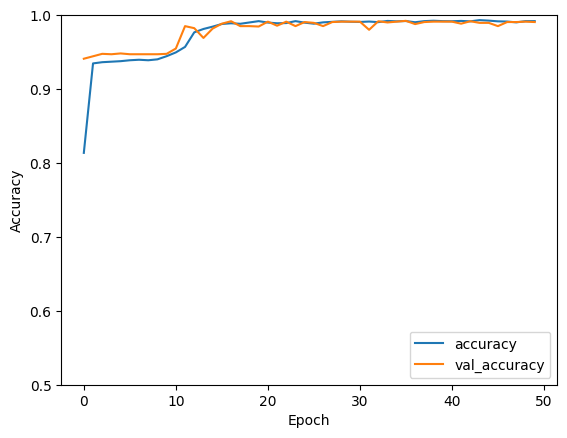

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
model.evaluate(x_test,y_test)

57/57 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9868


[0.06681963056325912, 0.9867695569992065]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 6, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 3, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 3, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 64)                1